<a href="https://colab.research.google.com/github/Jed-77/tensorflow-deeplearning/blob/master/TF2_0_ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Code to test NN on synthetic dataset; namely predicting a function:**
   f(x,y)=cos(2x)+cos(3y)

   Real goal is to show that through a simple neural network (which is mostly linear equations with a Relu activation function), we can approximate a highly non-linear multi-variate function. VERY COOL!

In [0]:
# Install Tensorflow
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
# Other imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3    # uniform distribution between (-3, 3)
Y = np.cos(2*X[:, 0]) + np.cos(3*X[:, 1])

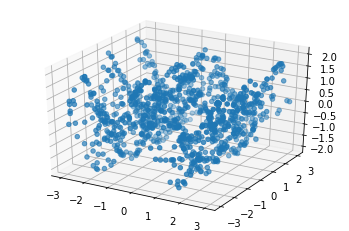

In [0]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [0]:
# Create a model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
  tf.keras.layers.Dense(1)
])

In [0]:
# Comple and fit the model
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

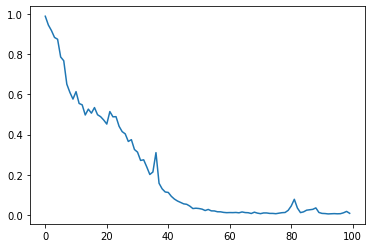

In [0]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

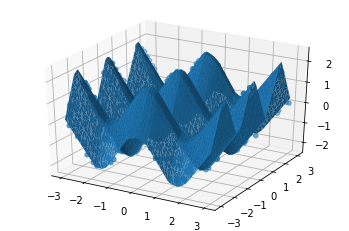

In [0]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Surface plot - create a 2d mesh grid and predict it using the nn
line = np.linspace(-3,3,50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()